In [1]:
import sys
import time
import logging
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




In [2]:
!git clone https://github.com/gsethi2409/tf-pose-estimation.git

Cloning into 'tf-pose-estimation'...
remote: Enumerating objects: 136, done.
remote: Total 136 (delta 0), reused 0 (delta 0), pack-reused 136
Receiving objects: 100% (136/136), 52.36 MiB | 38.60 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [5]:

!pip install -r tf-pose-estimation/requirements.txt

  Cloning https://github.com/ppwwyyxx/tensorpack.git to /tmp/pip-req-build-tv5qebvl
  Running command git clone -q https://github.com/ppwwyyxx/tensorpack.git /tmp/pip-req-build-tv5qebvl
  Created wheel for tensorpack: filename=tensorpack-0.11-py2.py3-none-any.whl size=296417 sha256=dd7c8ac92ba1085caaef50316de23861027f286ba5545aa419d02c17da896ccb
  Stored in directory: /tmp/pip-ephem-wheel-cache-x9dpglch/wheels/a8/b5/a9/025b3a1294b9ffff93309e6956c65aa80e0fa40821d29eff1e
Successfully built tensorpack


In [6]:
!sh /content/tf-pose-estimation/models/graph/cmu/download.sh

[download] model graph : cmu
--2021-06-08 20:35:46--  http://download2268.mediafire.com/wbqy0jecklqg/qlzzr20mpocnpa3/graph_opt.pb
Resolving download2268.mediafire.com (download2268.mediafire.com)... 199.91.155.9
Connecting to download2268.mediafire.com (download2268.mediafire.com)|199.91.155.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209299198 (200M) [application/octet-stream]
Saving to: ‘/content/tf-pose-estimation/models/graph/cmu/graph_opt.pb’

/content/tf-pose-es 100%[===================>] 199.60M  3.85MB/s    in 68s     

2021-06-08 20:36:55 (2.92 MB/s) - ‘/content/tf-pose-estimation/models/graph/cmu/graph_opt.pb’ saved [209299198/209299198]

[download] end


In [7]:
model='mobilenet_thin'
resize='432x368'
w, h = model_wh(resize)

In [8]:
e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2021-06-08 20:38:34,353] [TfPoseEstimator] [INFO] loading graph from /usr/local/lib/python3.7/dist-packages/tf_pose_data/graph/mobilenet_thin/graph_opt.pb(default size=432x368)






TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimat

In [18]:
image_1 = common.read_imgfile('/content/drive/MyDrive/Colab Notebooks/human.jpg', None, None)
human = e.inference(image_1, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)

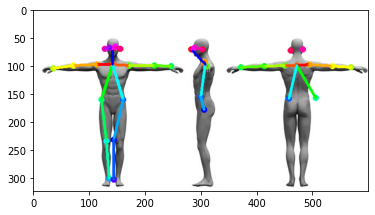

In [19]:
image_1_estimated = TfPoseEstimator.draw_humans(image_1, human, imgcopy=False)
plt.imshow(image_1_estimated)

In [20]:
image_2 = common.read_imgfile('/content/drive/MyDrive/Colab Notebooks/humans.jpg', None, None)
humans = e.inference(image_2, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)

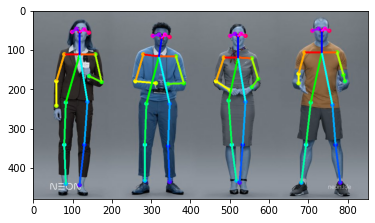

In [21]:
image_2_estimated = TfPoseEstimator.draw_humans(image_2, humans, imgcopy=False)
plt.imshow(image_2_estimated)